In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
#load the csv into a dataframe
df = pd.read_csv('pulsar_stars.csv')

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
#clean up the preceding white space in the column names
clean_column_names = []

for name in df.columns:
    clean_name = name.lstrip()
    clean_column_names.append(clean_name)
    
df.columns = clean_column_names
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [17]:
#split the dataset between pulsars and non-pulsars
pulsar_group = df[df['target_class'] == 1]
non_pulsar_group = df[df['target_class'] == 0]

In [88]:
corr_matrix = df[[
    'Mean of the integrated profile',
    'Standard deviation of the integrated profile',
    'Excess kurtosis of the integrated profile',
    'Skewness of the integrated profile', 
    'Mean of the DM-SNR curve',
    'Standard deviation of the DM-SNR curve',
    'Excess kurtosis of the DM-SNR curve', 
    'Skewness of the DM-SNR curve'
]].corr()

In [9]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

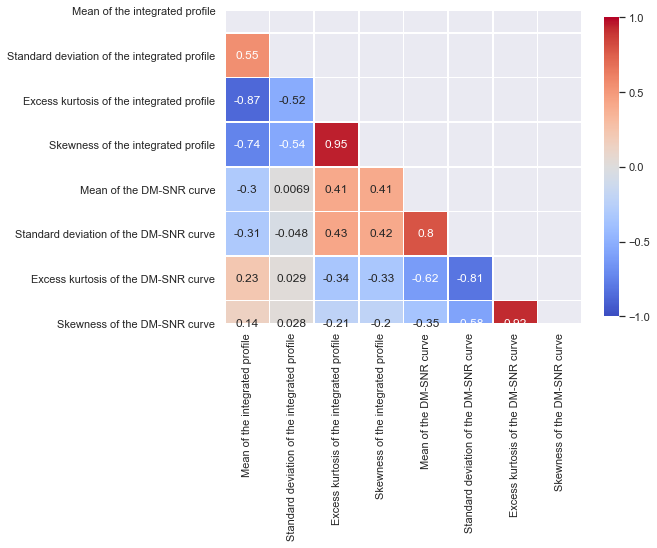

In [14]:
f, ax = plt.subplots(figsize=(8, 11))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink' : .5,
                                 'ticks' : [-1, -.5, 0, .5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size' : 12}
                     )

heatmap

In [15]:
#compare histogram and ecdf side by side for each feature, both pulsar and non pulsar groups
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [32]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    
    return x, y

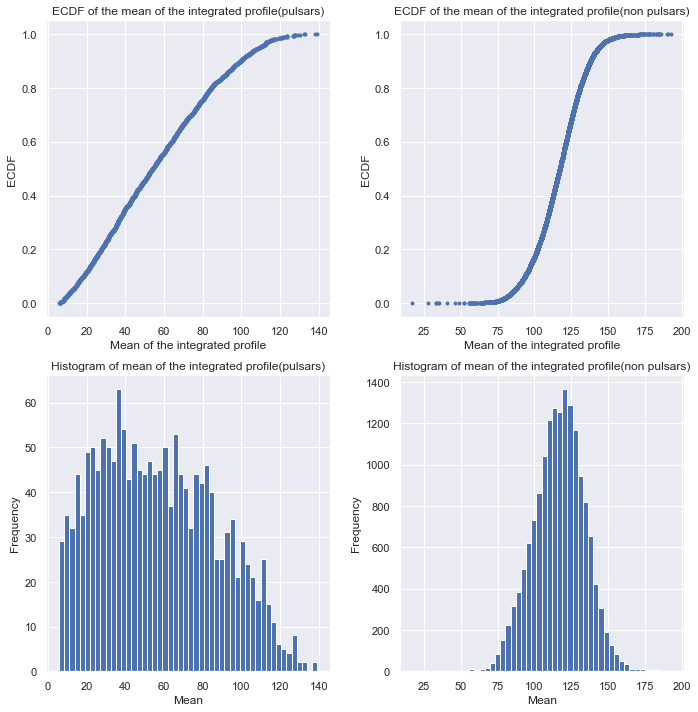

In [85]:
pulsar_mean_int_prof_x, pulsar_mean_int_prof_y = ecdf(pulsar_group['Mean of the integrated profile'])
nonpulsar_mean_int_prof_x, nonpulsar_mean_int_prof_y = ecdf(non_pulsar_group['Mean of the integrated profile'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_mean_int_prof_x, pulsar_mean_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of the mean of the integrated profile(pulsars)')
_ = plt.xlabel('Mean of the integrated profile')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_mean_int_prof_x, nonpulsar_mean_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of the mean of the integrated profile(non pulsars)')
_ = plt.xlabel('Mean of the integrated profile')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Mean of the integrated profile'], bins=50)
_ = plt.title("Histogram of mean of the integrated profile(pulsars)")
_ = plt.xlabel('Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Mean of the integrated profile'], bins=50)
_ = plt.title("Histogram of mean of the integrated profile(non pulsars)")
_ = plt.xlabel('Mean')
_ = plt.ylabel('Frequency')

plt.tight_layout()


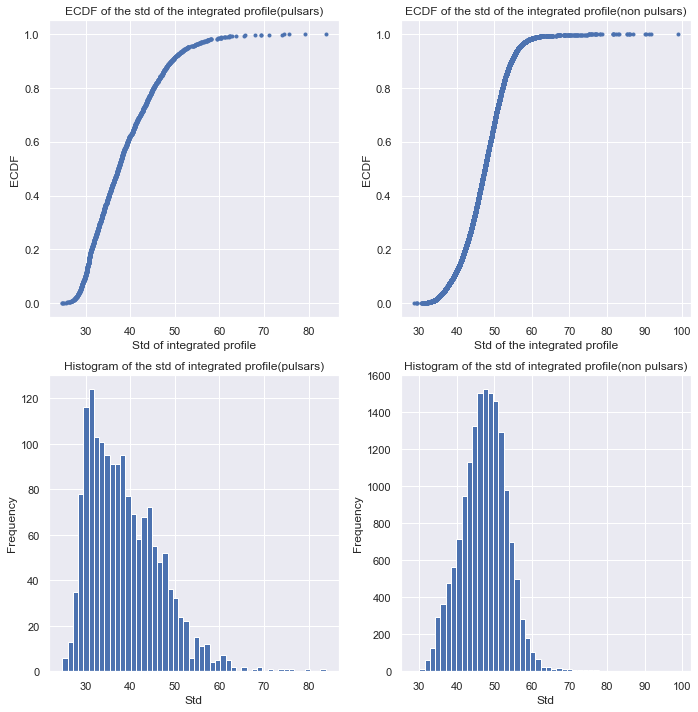

In [99]:
pulsar_std_int_prof_x, pulsar_std_int_prof_y = ecdf(pulsar_group['Standard deviation of the integrated profile'])
nonpulsar_std_int_prof_x, nonpulsar_std_int_prof_y = ecdf(non_pulsar_group['Standard deviation of the integrated profile'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_std_int_prof_x, pulsar_std_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of the std of the integrated profile(pulsars)')
_ = plt.xlabel('Std of integrated profile')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsars_std_int_prof_x, nonpulsars_std_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of the std of the integrated profile(non pulsars)')
_ = plt.xlabel('Std of the integrated profile')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Standard deviation of the integrated profile'], bins=50)
_ = plt.title('Histogram of the std of integrated profile(pulsars)')
_ = plt.xlabel('Std')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Standard deviation of the integrated profile'], bins=50)
_ = plt.title('Histogram of the std of integrated profile(non pulsars)')
_ = plt.xlabel('Std')
_ = plt.ylabel('Frequency')

plt.tight_layout()

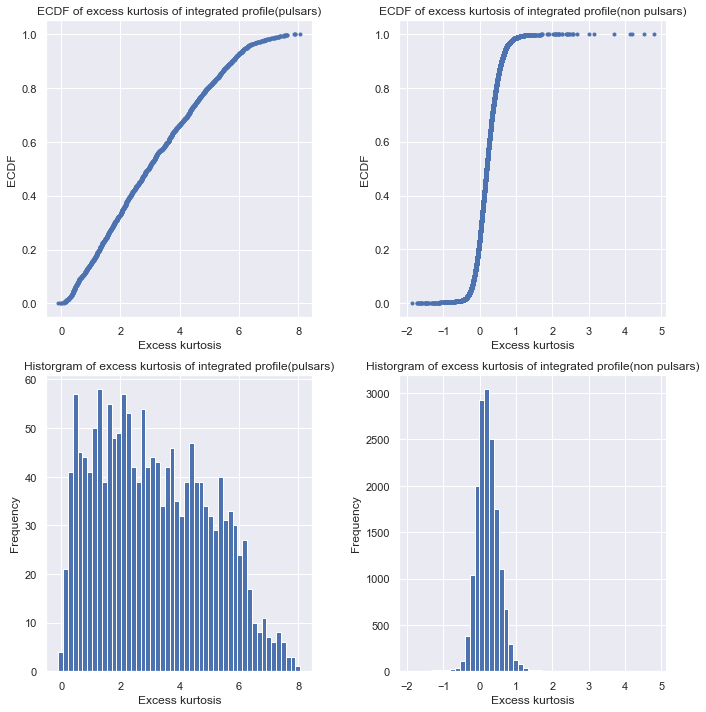

In [95]:
pulsar_excess_kurt_int_prof_x, pulsar_excess_kurt_int_prof_y = ecdf(pulsar_group['Excess kurtosis of the integrated profile'])
nonpulsar_excess_kurt_int_prof_x, nonpulsar_excess_kurt_int_prof_y = ecdf(non_pulsar_group['Excess kurtosis of the integrated profile'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_excess_kurt_int_prof_x, pulsar_excess_kurt_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of excess kurtosis of integrated profile(pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_excess_kurt_int_prof_x, nonpulsar_excess_kurt_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of excess kurtosis of integrated profile(non pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Excess kurtosis of the integrated profile'], bins=50)
_ = plt.title('Historgram of excess kurtosis of integrated profile(pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Excess kurtosis of the integrated profile'], bins=50)
_ = plt.title('Historgram of excess kurtosis of integrated profile(non pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('Frequency')
plt.tight_layout()

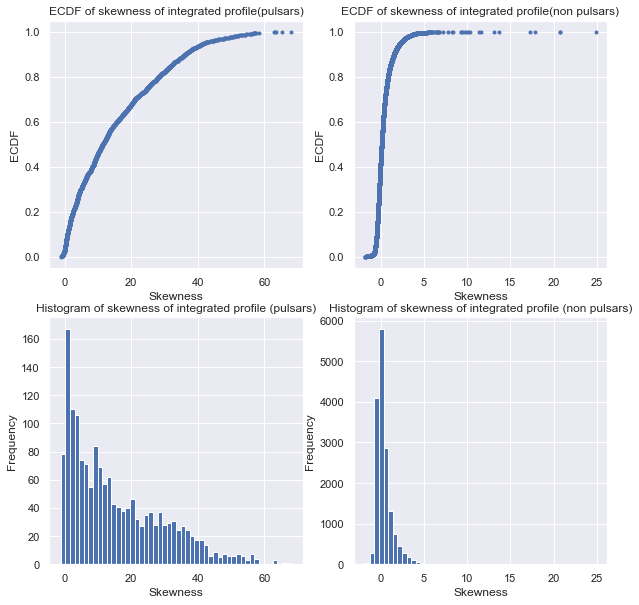

In [98]:
pulsar_skew_int_prof_x, pulsar_skew_int_prof_y = ecdf(pulsar_group['Skewness of the integrated profile'])
nonpulsar_skew_int_prof_x, nonpulsar_skew_int_prof_y = ecdf(non_pulsar_group['Skewness of the integrated profile'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_skew_int_prof_x, pulsar_skew_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of skewness of integrated profile(pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_skew_int_prof_x, nonpulsar_skew_int_prof_y, marker='.', linestyle='none')
_ = plt.title('ECDF of skewness of integrated profile(non pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Skewness of the integrated profile'], bins=50)
_ = plt.title('Histogram of skewness of integrated profile (pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Skewness of the integrated profile'], bins=50)
_ = plt.title('Histogram of skewness of integrated profile (non pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('Frequency')



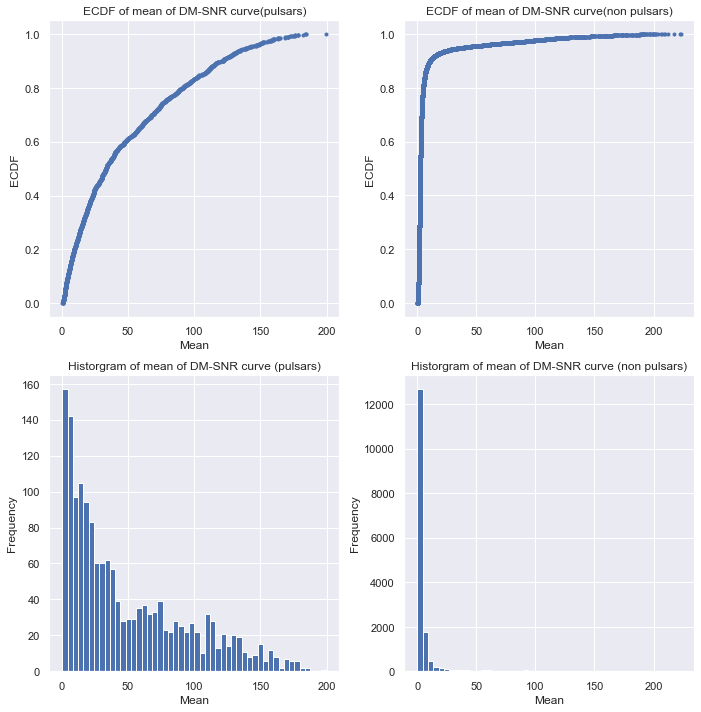

In [102]:
pulsar_mean_dmsnr_x, pulsar_mean_dmsnr_y = ecdf(pulsar_group['Mean of the DM-SNR curve'])
nonpulsar_mean_dmsnr_x, nonpulsar_mean_dmsnr_y = ecdf(non_pulsar_group['Mean of the DM-SNR curve'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_mean_dmsnr_x, pulsar_mean_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of mean of DM-SNR curve(pulsars)')
_ = plt.xlabel('Mean')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_mean_dmsnr_x, nonpulsar_mean_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of mean of DM-SNR curve(non pulsars)')
_ = plt.xlabel('Mean')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Mean of the DM-SNR curve'], bins=50)
_ = plt.title('Historgram of mean of DM-SNR curve (pulsars)')
_ = plt.xlabel('Mean')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Mean of the DM-SNR curve'], bins=50)
_ = plt.title('Historgram of mean of DM-SNR curve (non pulsars)')
_ = plt.xlabel('Mean')
_ = plt.ylabel('Frequency')

plt.tight_layout()

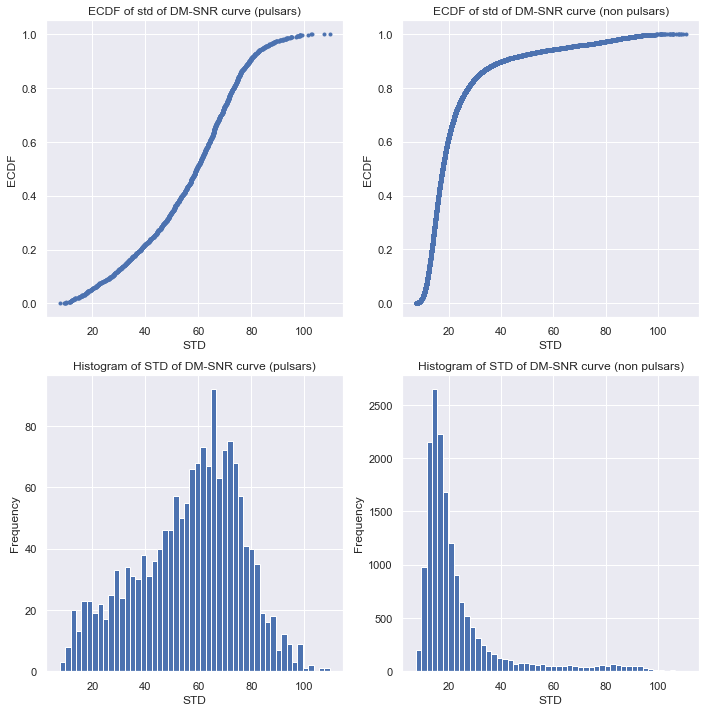

In [104]:
pulsar_std_dmsnr_x, pulsar_std_dmsnr_y = ecdf(pulsar_group['Standard deviation of the DM-SNR curve'])
nonpulsar_std_dmsnr_x, nonpulsar_std_dmsnr_y = ecdf(non_pulsar_group['Standard deviation of the DM-SNR curve'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_std_dmsnr_x, pulsar_std_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of std of DM-SNR curve (pulsars)')
_ = plt.xlabel('STD')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_std_dmsnr_x, nonpulsar_std_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of std of DM-SNR curve (non pulsars)')
_ = plt.xlabel('STD')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Standard deviation of the DM-SNR curve'], bins=50)
_ = plt.title('Histogram of STD of DM-SNR curve (pulsars)')
_ = plt.xlabel('STD')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Standard deviation of the DM-SNR curve'], bins=50)
_ = plt.title('Histogram of STD of DM-SNR curve (non pulsars)')
_ = plt.xlabel('STD')
_ = plt.ylabel('Frequency')

plt.tight_layout()




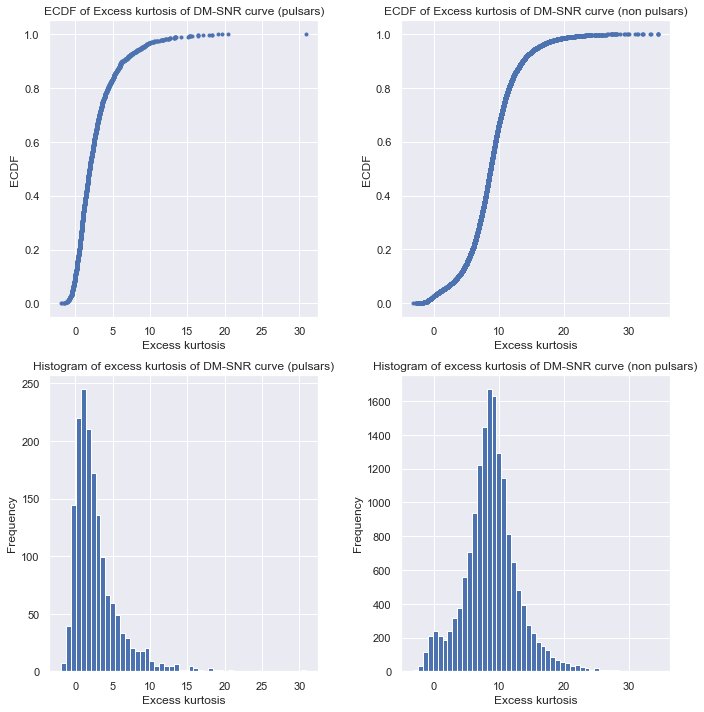

In [108]:
pulsar_excess_kurt_dmsnr_x, pulsar_excess_kurt_dmsnr_y = ecdf(pulsar_group['Excess kurtosis of the DM-SNR curve'])
nonpulsar_excess_kurt_dmsnr_x, nonpulsar_excess_kurt_dmsnr_y = ecdf(non_pulsar_group['Excess kurtosis of the DM-SNR curve'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_excess_kurt_dmsnr_x, pulsar_excess_kurt_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of Excess kurtosis of DM-SNR curve (pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_excess_kurt_dmsnr_x, nonpulsar_excess_kurt_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of Excess kurtosis of DM-SNR curve (non pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Excess kurtosis of the DM-SNR curve'], bins=50)
_ = plt.title('Histogram of excess kurtosis of DM-SNR curve (pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Excess kurtosis of the DM-SNR curve'], bins=50)
_ = plt.title('Histogram of excess kurtosis of DM-SNR curve (non pulsars)')
_ = plt.xlabel('Excess kurtosis')
_ = plt.ylabel('Frequency')

plt.tight_layout()

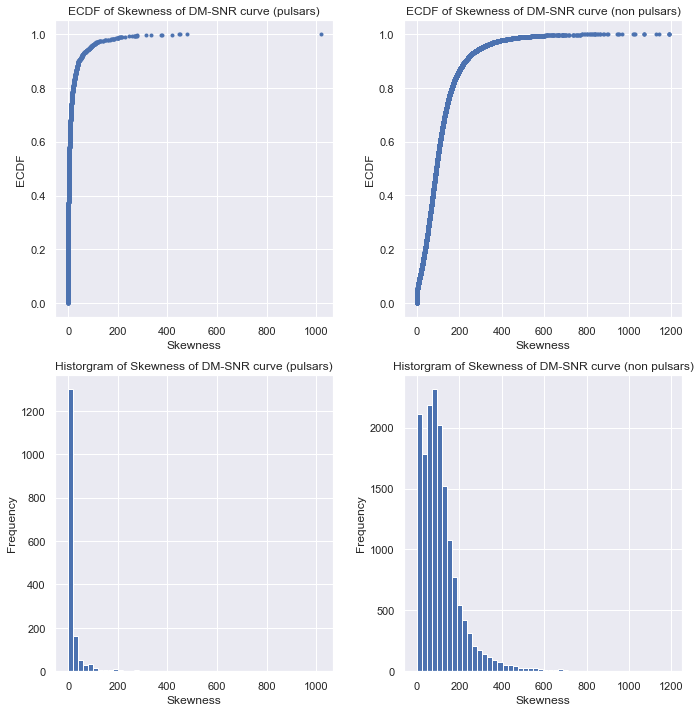

In [112]:
pulsar_skew_dmsnr_x, pulsar_skew_dmsnr_y = ecdf(pulsar_group['Skewness of the DM-SNR curve'])
nonpulsar_skew_dmsnr_x, nonpulsar_skew_dmsnr_y = ecdf(non_pulsar_group['Skewness of the DM-SNR curve'])

_ = plt.figure(figsize=(10, 10))
_ = plt.subplot(221)
_ = plt.plot(pulsar_skew_dmsnr_x, pulsar_skew_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of Skewness of DM-SNR curve (pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('ECDF')

_ = plt.subplot(222)
_ = plt.plot(nonpulsar_skew_dmsnr_x, nonpulsar_skew_dmsnr_y, marker='.', linestyle='none')
_ = plt.title('ECDF of Skewness of DM-SNR curve (non pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('ECDF')

_ = plt.subplot(223)
_ = plt.hist(pulsar_group['Skewness of the DM-SNR curve'], bins=50)
_ = plt.title('Historgram of Skewness of DM-SNR curve (pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('Frequency')

_ = plt.subplot(224)
_ = plt.hist(non_pulsar_group['Skewness of the DM-SNR curve'], bins=50)
_ = plt.title('Historgram of Skewness of DM-SNR curve (non pulsars)')
_ = plt.xlabel('Skewness')
_ = plt.ylabel('Frequency')

plt.tight_layout()



